In [ ]:
u #We choose this data set because it seemed like the most interesting set of datat that wasn't 100% focused on purely numbers. It also allowed for some real world relevancy that can
#still be interesting to us.
#this is the link for the data set: https://catalog.data.gov/dataset/popular-baby-names

In [ ]:
import pandas as pd
baby_names = pd.read_csv("/content/Popular_Baby_Names.csv")

baby_names

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


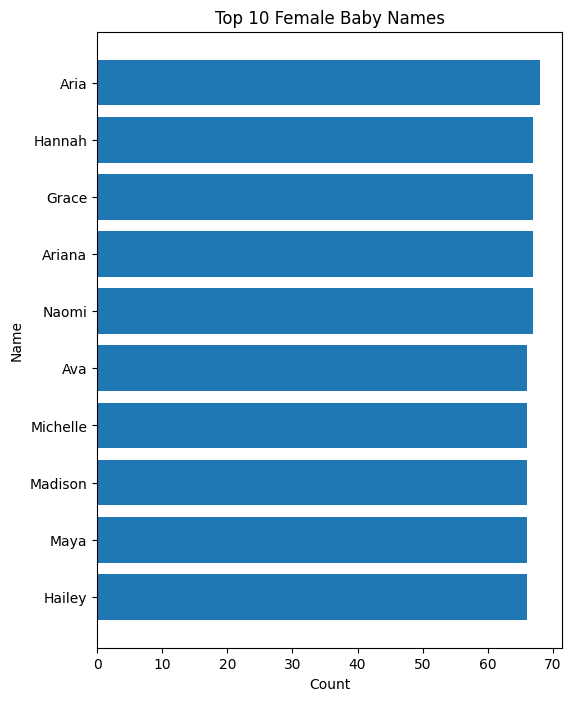

In [ ]:
#RQ: What are the patterns of the top 10 female baby names in the US, not considering any other characteristics?#

import matplotlib.pyplot as plt

#cleaning the data to obtain the counts and names for the top 10 females#
female_names_df = baby_names[baby_names['Gender'] == 'FEMALE']
name_counts = female_names_df["Child's First Name"].value_counts()
sorted_name_counts = name_counts.sort_values(ascending=False)
top_10_female_names = sorted_name_counts.head(10)
names = top_10_female_names.index.tolist()
counts = top_10_female_names.values.tolist()

#creating the bar graph#
plt.figure(figsize=(6,8))
plt.barh(names,counts)
plt.xlabel("Count")
plt.ylabel("Name")
plt.title("Top 10 Female Baby Names")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#conclusion: the graph shows that there is a very even distribution between the top 10 female baby names#

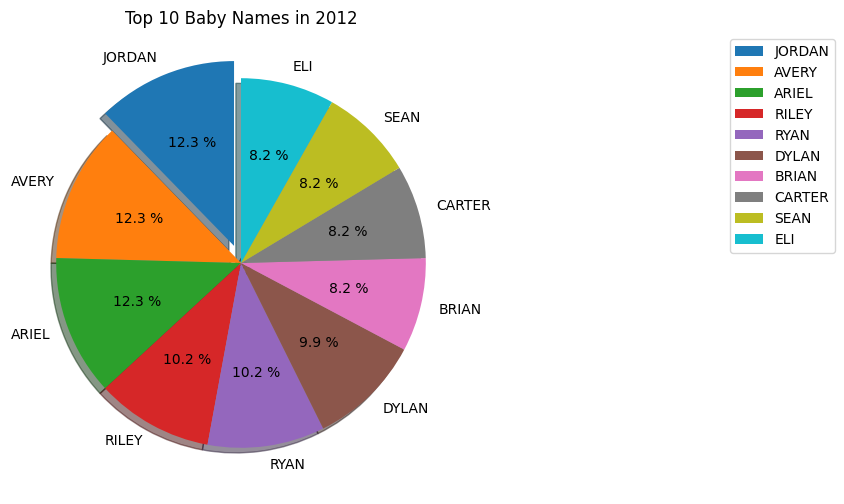

In [ ]:
#RQ: What can be concluded from the information gathered of the top 10 baby names in 2012 for both genders and all ethnicities?#

#cleaning the data to obtain the top 10 names and counts for 2012#
names_2012 = baby_names[baby_names["Year of Birth"] == 2012]
counts_of_names = names_2012["Child's First Name"].value_counts()
counts_sorted = counts_of_names.sort_values(ascending=False)
top_10_2012_names = counts_sorted.head(10)
names = top_10_2012_names.index.tolist()
counts = top_10_2012_names.values.tolist()

#creating the pie chart#
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(6,6))
plt.pie(top_10_2012_names, explode=explode, labels=names, autopct="%.1f %%", shadow=True, startangle=90)
plt.legend(labels=names, bbox_to_anchor=(1.8,1))
plt.title("Top 10 Baby Names in 2012")
plt.show()

In [ ]:
#conclusion: the pie chart shows that there is a relatively even distribution of the top 10 names in 2012, specifically with Jordan, Avery, and Ariel having the same percentage as well as Riely and Ryan and Eli, Sean, Carter, and Brian#

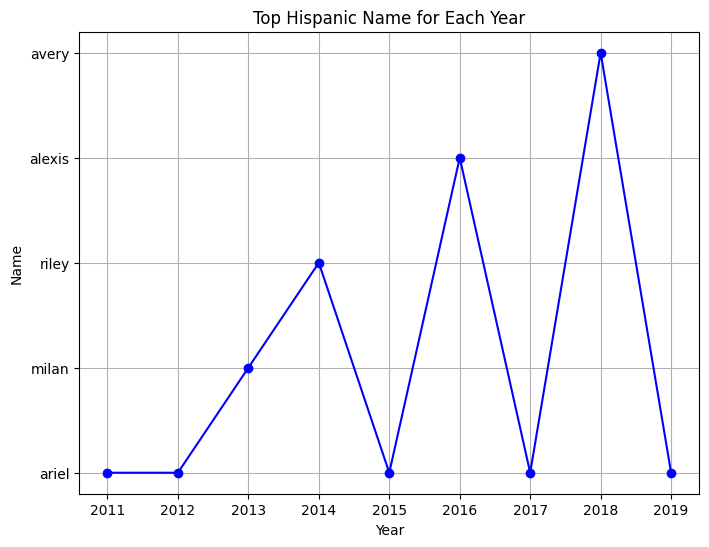

In [ ]:
#RQ: What patterns can be observed from the top baby name with hispanic ethnicity for each year in the dataset?#

#cleaning the data to obtain the top names of hispanics for each year in the dataset#
baby_names["Child's First Name"] = baby_names["Child's First Name"].str.lower() #accounting for overlapping names in the dataset#
names_hispanic = baby_names[baby_names["Ethnicity"]=="HISPANIC"]
hispanic_name_counts = names_hispanic.groupby(["Year of Birth", "Child's First Name"]).size().reset_index(name="Count")
max_indices = hispanic_name_counts.groupby("Year of Birth")["Count"].idxmax()
top_hispanic_names = hispanic_name_counts.loc[max_indices]

#creating the line graph#
plt.figure(figsize=(8,6))
plt.plot(top_hispanic_names["Year of Birth"], top_hispanic_names["Child's First Name"], marker='o', color='b', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Name")
plt.grid()
plt.title("Top Hispanic Name for Each Year")
plt.show()

In [ ]:
#conclusion: the graph shows that there is an overlap with the name Ariel in 2011, 2012, 2015, 2017, and 2019#

In [ ]:
import pandas as pd
babynames_df = pd.read_csv("Popular_Baby_Names.csv")

babynames_df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
57577,2014,MALE,WHITE NON HISPANIC,Yousef,18,94
57578,2014,MALE,WHITE NON HISPANIC,Youssef,24,88
57579,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96
57580,2014,MALE,WHITE NON HISPANIC,Zachary,90,39


In [ ]:
#RQ: What are the patterns of popular baby names in the US based on the intersection between gender and ethnicity? (In this case Black Non Hispanic and Female)
#cleaning the data to get the top 10 female baby names for Black Non Hispanic

female_names = babynames_df[babynames_df["Gender"] == "FEMALE"]
female_names2 = female_names[female_names["Ethnicity"] == "BLACK NON HISPANIC"]
babynames_df2 = female_names2["Child's First Name"].value_counts().sort_values(ascending = True).tail(10)
print(babynames_df2)

Child's First Name
Hannah       17
Gabriella    17
Kayla        17
Jordyn       17
Michelle     17
Journey      17
Mariam       17
Aniyah       17
Elizabeth    17
Ariel        17
Name: count, dtype: int64


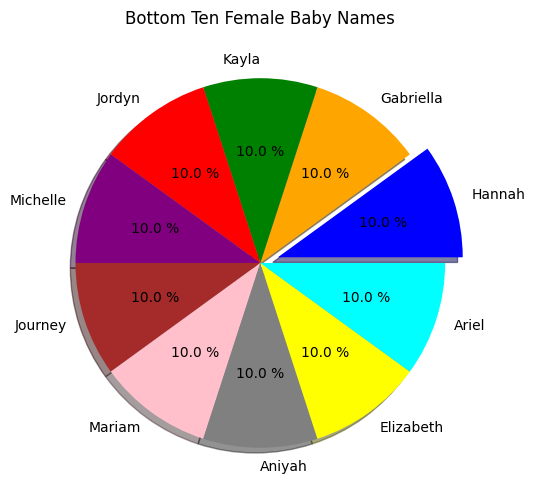

In [ ]:
#Using the last cells info to make it into a pie graph

import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
labels = babynames_df2.index
explode = (0.1,0,0,0,0,0,0,0,0,0)
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "yellow", "cyan"]

plt.pie(babynames_df2, colors = colors, labels = labels, explode = explode,
        autopct = "%.1f %%", shadow = True)
plt.title("Bottom Ten Female Baby Names")


plt.show()

In [ ]:
#conclusion: this shows that there is an even distribution between the top names for this demographic

In [ ]:
#RQ:How do naming patterns vary based on the year, without considering other characteristics?
#cleaning data to get the top 20 baby names of 2014 regardless of gender
names_2014 = babynames_df[babynames_df["Year of Birth"] == 2014]
babynames_df3 = names_2014["Child's First Name"].value_counts().sort_values(ascending= False).head(20)
print(babynames_df3)

Child's First Name
Riley          46
Ariel          35
Avery          33
Jordan         29
Logan          29
Dylan          28
Miles          24
Aria           24
Kyle           24
Luke           24
Christopher    24
Naomi          24
Kai            24
Ayden          24
James          24
Eli            24
Tristan        24
Nathaniel      24
Steven         24
Christina      24
Name: count, dtype: int64


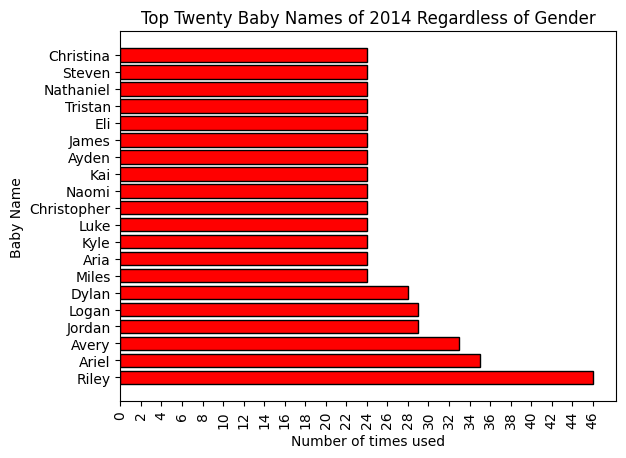

In [ ]:
#making a bar graph based on the data from the last cell

plt.barh(babynames_df3.index, babynames_df3.values, color = "red", edgecolor = "black")
plt.xlabel("Number of times used")
plt.ylabel("Baby Name")
customx_ticks = range(0,47,2)
plt.xticks(customx_ticks, rotation = 90)
plt.title("Top Twenty Baby Names of 2014 Regardless of Gender")

plt.show()

In [ ]:
#conclusion: this shows that the top name of 2014 was Riley, without considering gender.

In [ ]:
#How do similar naming characteristics like starting letter vary based on gender?

#cleaning code to find the top 10 A names

babynames_df["First Letter"] = babynames_df["Child's First Name"].str[0] #wasn't sure if this was right so I used this website to reference for the part about getting the first letter. (I think it's the third or fourth one):https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column
name_counts_by_letter_gender = babynames_df.groupby(["First Letter", "Gender"])["Child's First Name"].value_counts()

top_tenA_names_boys = name_counts_by_letter_gender.loc[("A", "MALE")].sort_values(ascending = True).tail(10)
top_tenA_names_girls = name_counts_by_letter_gender.loc[("A", "FEMALE")].sort_values(ascending = True).tail(10)

print(top_tenA_names_boys)
print(top_tenA_names_girls)

Child's First Name
Alex         60
Ayden        60
Alexander    64
Andrew       64
Adam         65
Austin       66
Adrian       66
Aiden        66
Anthony      67
Aaron        68
Name: count, dtype: int64
Child's First Name
Angelina    59
Ashley      62
Alyssa      64
Arianna     64
Amelia      64
Abigail     65
Avery       65
Ava         66
Ariana      67
Aria        68
Name: count, dtype: int64


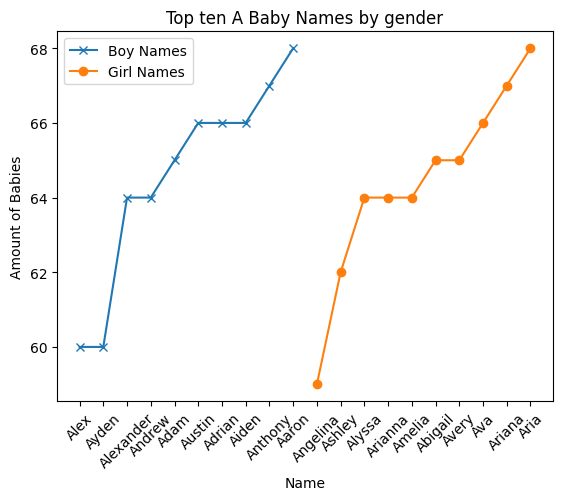

In [ ]:
# using the previous code to make a line graph based on the data from the last cell

import matplotlib.pyplot as plt

x_boys = top_tenA_names_boys.index
y_boys = top_tenA_names_boys.values
label_boys = "Boy Names"

plt.plot(x_boys, y_boys, marker = "x", label = label_boys)


x_girls = top_tenA_names_girls.index
y_girls = top_tenA_names_girls.values
label_girls = "Girl Names"

plt.plot(x_girls, y_girls, marker = "o", label = label_girls)

plt.xticks(rotation = 45)
plt.legend()
plt.xlabel("Name")
plt.ylabel("Amount of Babies")
plt.title("Top ten A Baby Names by gender")

plt.show()
#I watched a youtube video to figure out to plot two sets of data on graph :https://www.youtube.com/watch?v=IHXdRPYWXzw
#i also used this page and mized the documentation together with the video: https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

In [ ]:
#conclusion: this shows that there is no overlap in names, as well as that there is a very similar distribution between the popular A names for boys and for girls overall
 #(specific years weren't taken into account)